# Report on Spring ISD

In [1]:
import os
import sys

script_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))  # one level up
sys.path.append(script_dir)

from KNN_Diagnostic_Plots import plot_economically_disadvantaged_side_by_side, plot_language_education_bars, plot_gifted_talented_bars, plot_special_ed_504_bar, plot_race_ethnicity_stacked_bar, plot_student_teacher_ratio_bars, plot_student_staff_counts, plot_special_populations_bar

from getData import get_data

from compareNeighbors import comparePlotter, compareMetrics

from Demographic_Buckets import student_count
from Demographic_Buckets import staff_count
from Demographic_Buckets import race_ethnicity_percent
from Demographic_Buckets import economically_disadvantaged
from Demographic_Buckets import special_ed_504
from Demographic_Buckets import language_education_percent
from Demographic_Buckets import special_populations_percent
from Demographic_Buckets import gifted_students
from Demographic_Buckets import student_teacher_ratio

import pandas as pd

In [2]:
df = get_data("/Users/biancaschutz", 2023)
springISD = 101919

In [3]:
all_neighbors = compareMetrics(district_id = springISD, df = df)


In [4]:
pd.DataFrame({'Unique Neighbors': all_neighbors['DISTNAME'][all_neighbors['DISTRICT_id'] != springISD].unique()})

,Unique Neighbors
0,DUNCANVILLE ISD
1,MARSHALL ISD
2,LONGVIEW ISD
3,ARLINGTON ISD
4,PORT ARTHUR ISD
5,SHELDON ISD
6,STAFFORD MSD
7,EVERMAN ISD
8,LAKE WORTH ISD
9,MANOR ISD


## Student-Teacher Ratio

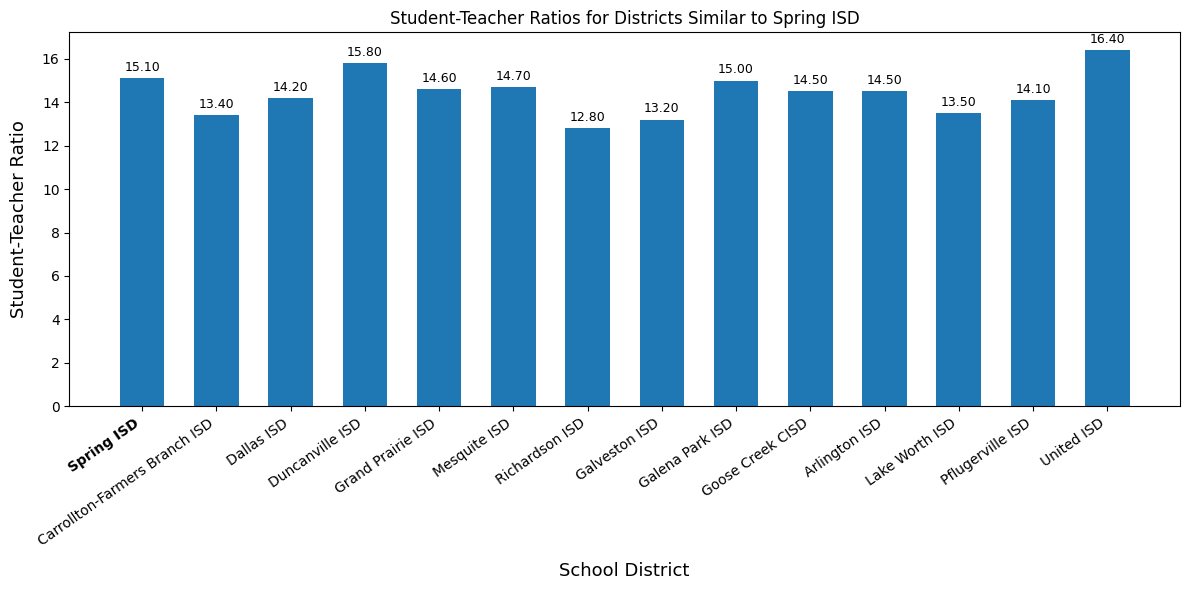

In [5]:
student_teacher_ratio_plot = comparePlotter(district_id = springISD, plot_func = plot_student_teacher_ratio_bars, df = df, selected_features= gifted_students + race_ethnicity_percent + student_count + staff_count + economically_disadvantaged + language_education_percent + special_populations_percent + special_ed_504 + student_teacher_ratio)

## Staff/Student Count

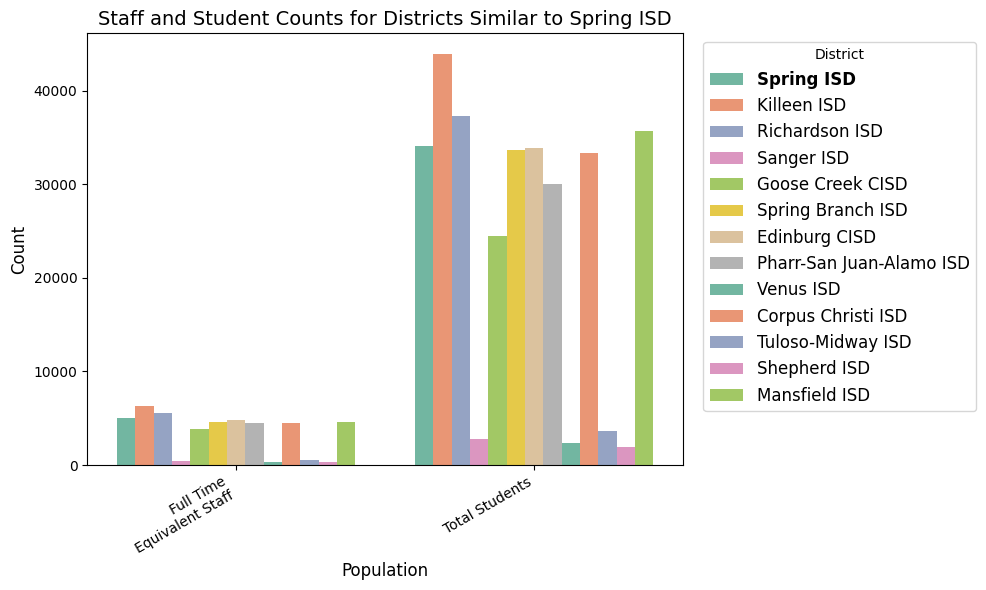

In [6]:
student_staff_count_plot = comparePlotter(district_id = springISD, plot_func = plot_student_staff_counts, df = df, distance_metrics = ['euclidean', 'manhattan', 'mahalanobis', 'cosine', 'canberra'], selected_features = staff_count + student_count)

## Race/Ethnicity

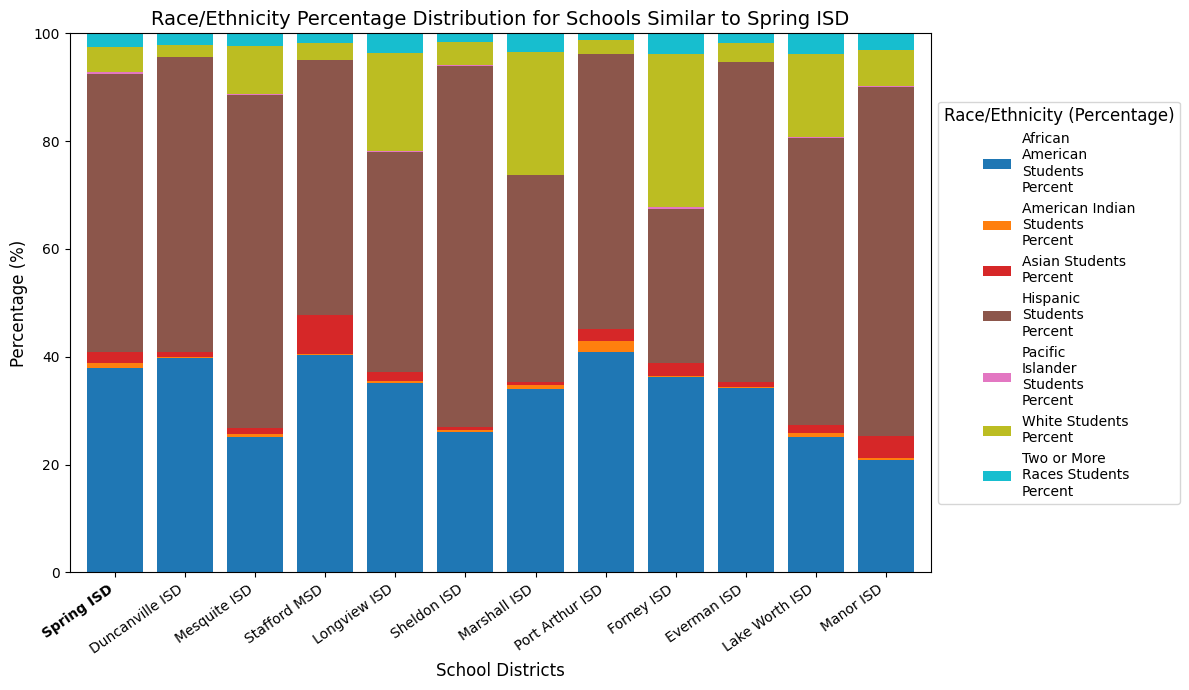

In [7]:
race_ethnicity_plot = comparePlotter(springISD, plot_func = plot_race_ethnicity_stacked_bar, df = df, distance_metrics = ['euclidean', 'manhattan', 'mahalanobis', 'cosine', 'canberra'], selected_features = race_ethnicity_percent)

## Special Populations

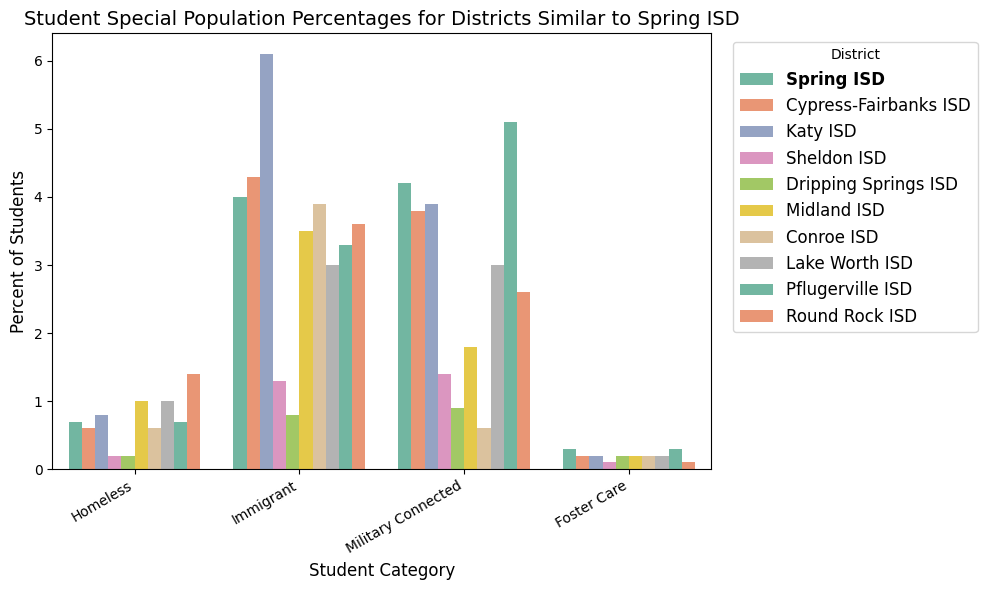

In [8]:
import matplotlib.pyplot as plt

special_populations_plot = comparePlotter(springISD, plot_func = plot_special_populations_bar, df = df, distance_metrics = ['euclidean', 'manhattan', 'mahalanobis', 'cosine', 'canberra'], selected_features = special_populations_percent)

## Special Education and 504

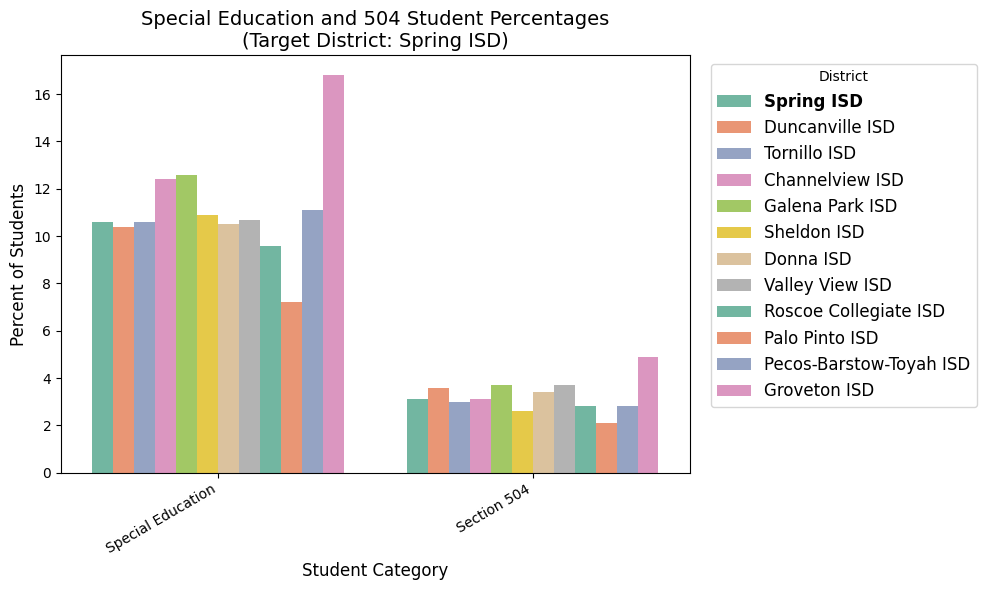

In [9]:
plot_special_ed_504_plot = comparePlotter(springISD, plot_func = plot_special_ed_504_bar, df = df, selected_features = special_ed_504)

## Gifted and Talented

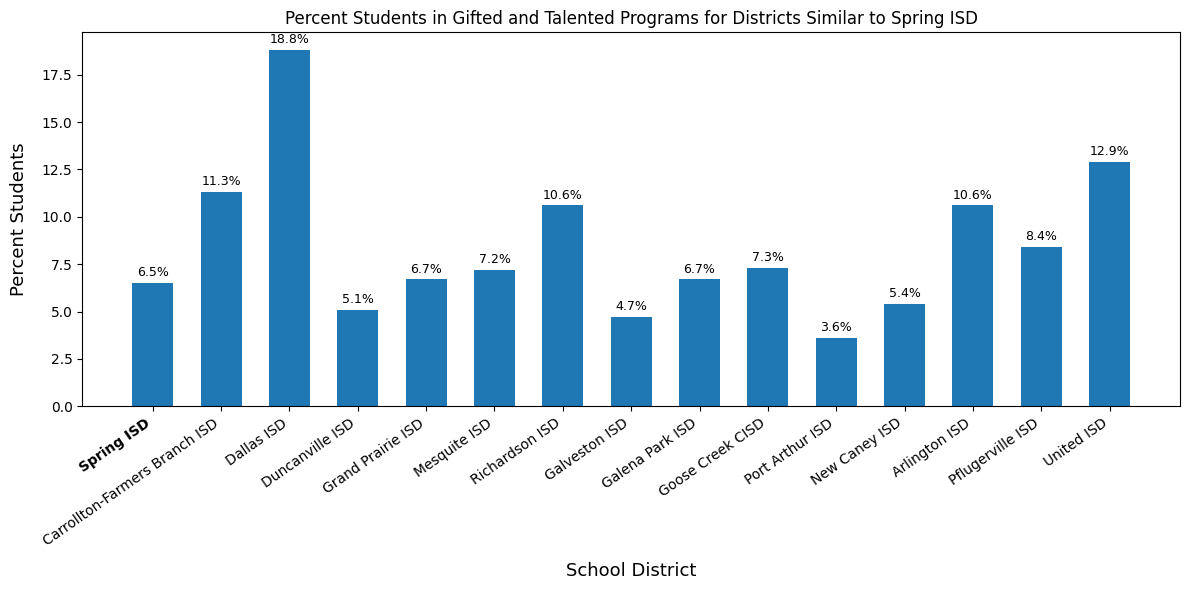

In [10]:
gifted_talented_plot = comparePlotter(springISD, plot_func = plot_gifted_talented_bars, df = df, distance_metrics = ['euclidean', 'manhattan', 'mahalanobis', 'cosine', 'canberra'], selected_features = gifted_students + race_ethnicity_percent + student_count + staff_count + economically_disadvantaged + language_education_percent + special_populations_percent + special_ed_504 + student_teacher_ratio)

## Bilingual and Language Education

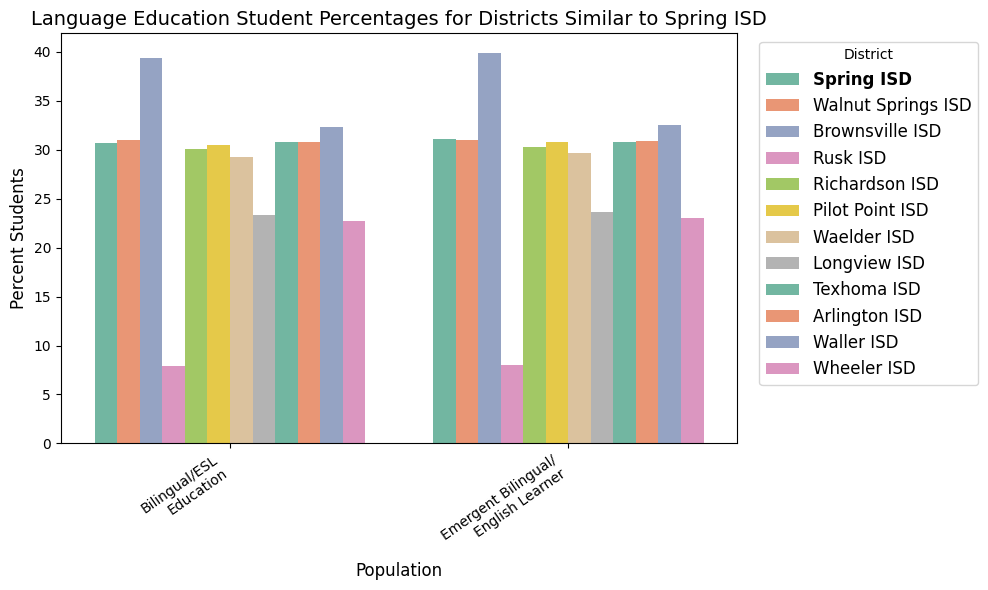

In [11]:
language_education_plot = comparePlotter(springISD, plot_func = plot_language_education_bars, df = df, selected_features = language_education_percent)

## Economically Disadvantaged

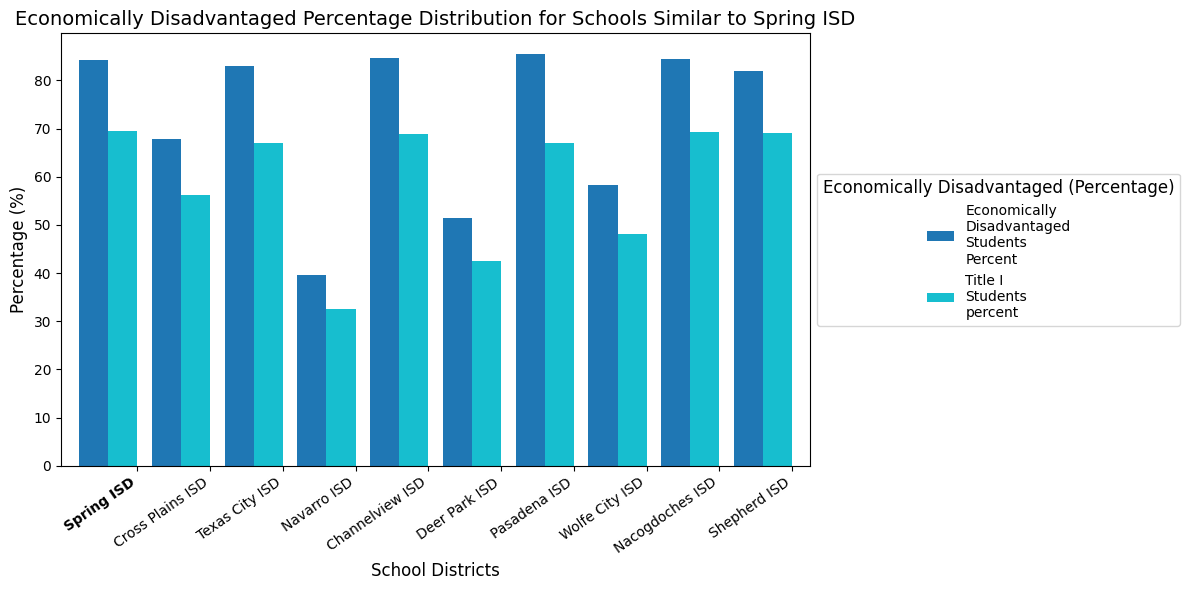

In [12]:
econ_disadv_plot = comparePlotter(springISD, plot_func = plot_economically_disadvantaged_side_by_side, df = df, selected_features = economically_disadvantaged)

# Example of Distance-Based Mechanism

In [13]:
neighbors = compareMetrics(springISD, df = df, selected_features = [economically_disadvantaged[0], race_ethnicity_percent[3]])

example_data = df[df['DISTRICT_id'].isin(neighbors['DISTRICT_id'])]

example_data = example_data[['DISTNAME', 'DISTRICT_id', economically_disadvantaged[0], race_ethnicity_percent[3]]]

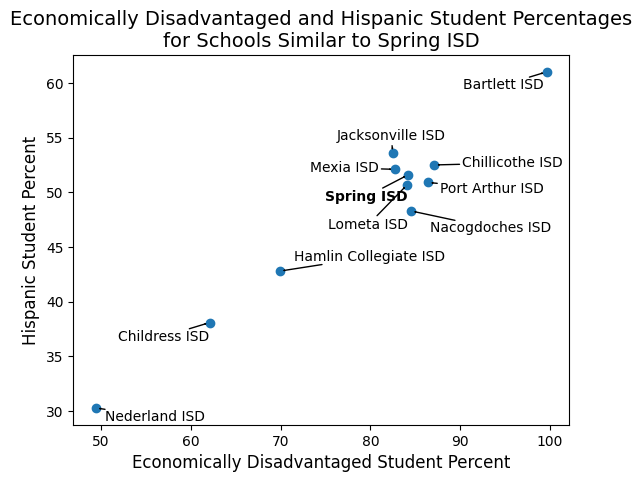

In [14]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
from KNN_Diagnostic_Plots import title_case_with_spaces

x = example_data[economically_disadvantaged[0]].reset_index(drop=True)
y = example_data[race_ethnicity_percent[3]].reset_index(drop=True)
l = [title_case_with_spaces(label) for label in example_data['DISTNAME'].reset_index(drop=True)]

fig, ax = plt.subplots()
ax.scatter(x, y)

texts = [ax.text(x[i], y[i], l[i], ha='center', va='center') for i in range(len(l))]

# Apply bold to the labels that match the condition
for text in texts:
    if 'Spring ISD'.lower() in text.get_text().lower():
        text.set_fontweight('bold')

adjust_text(texts, expand=(1.2, 2), # expand text bounding boxes by 1.2 fold in x direction and 2 fold in y direction
            arrowprops=dict(arrowstyle='->', color='black') # ensure the labeling is clear by adding arrows
            );
plt.title(f"Economically Disadvantaged and Hispanic Student Percentages\nfor Schools Similar to Spring ISD", fontsize=14)
plt.xlabel("Economically Disadvantaged Student Percent", fontsize=12)
plt.ylabel("Hispanic Student Percent", fontsize=12)
plt.show()


## Neighbors, All Buckets

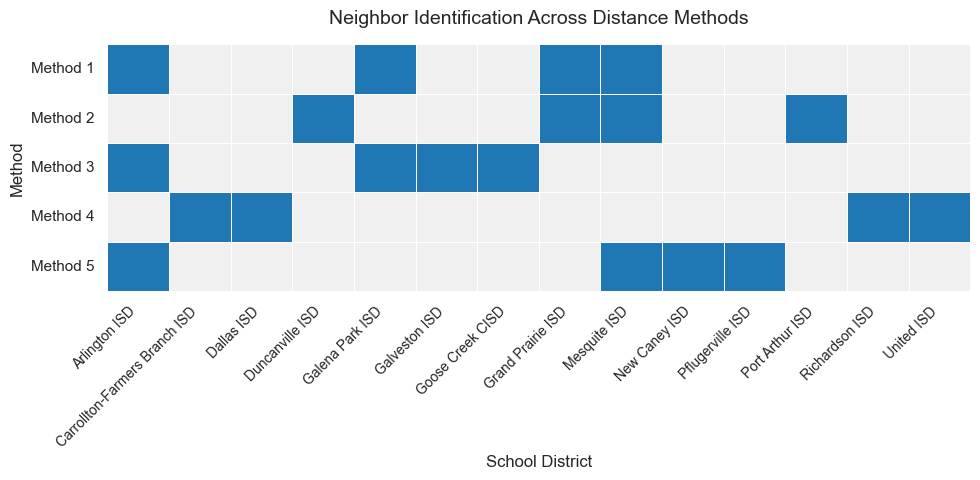

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#all buckets
neighbors = compareMetrics(springISD, df = df, selected_features = gifted_students + race_ethnicity_percent + student_count + staff_count + economically_disadvantaged + language_education_percent + special_populations_percent + special_ed_504 + student_teacher_ratio)

neighbors = neighbors[neighbors['DISTRICT_id'] != springISD]

neighbors['DISTNAME'] = [title_case_with_spaces(dist) for dist in neighbors['DISTNAME']]

# Presence matrix
presence_matrix = (
    neighbors.drop_duplicates()
      .assign(value=1)
      .pivot_table(index="DISTNAME", columns="metric", values="value", fill_value=0)
)


# Transpose for methods on y-axis
matrix_T = presence_matrix.T

# Plot
sns.set(style="whitegrid", font_scale=1.1)

# Dynamically widen plot based on district count
n_districts = matrix_T.shape[1]
fig_width = max(10, n_districts * 0.6)  # Adjust this multiplier as needed

plt.figure(figsize=(fig_width, 5))
ax = sns.heatmap(
    matrix_T,
    cmap=sns.color_palette(["#f0f0f0", "#1f77b4"]),
    linewidths=0.7,
    linecolor="white",
    cbar=False,
    square=False
)

# Clean formatting
ax.set_title("Neighbor Identification Across Distance Methods", fontsize=14, pad=15)
ax.set_xlabel("School District", fontsize=12)
ax.set_ylabel("Method", fontsize=12)

# Rotate both axes for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=11)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

## Neighbors, Race Ethnicity

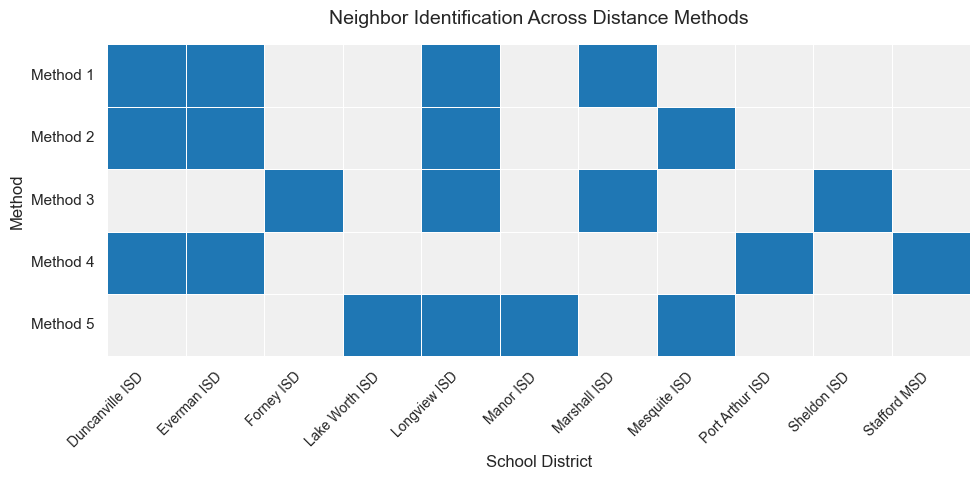

In [16]:
neighbors = compareMetrics(springISD, df = df, selected_features = race_ethnicity_percent)

neighbors = neighbors[neighbors['DISTRICT_id'] != springISD]

neighbors['DISTNAME'] = [title_case_with_spaces(dist) for dist in neighbors['DISTNAME']]

# Presence matrix
presence_matrix = (
    neighbors.drop_duplicates()
      .assign(value=1)
      .pivot_table(index="DISTNAME", columns="metric", values="value", fill_value=0)
)


# Transpose for methods on y-axis
matrix_T = presence_matrix.T

# Plot
sns.set(style="whitegrid", font_scale=1.1)

# Dynamically widen plot based on district count
n_districts = matrix_T.shape[1]
fig_width = max(10, n_districts * 0.6)  # Adjust this multiplier as needed

plt.figure(figsize=(fig_width, 5))
ax = sns.heatmap(
    matrix_T,
    cmap=sns.color_palette(["#f0f0f0", "#1f77b4"]),
    linewidths=0.7,
    linecolor="white",
    cbar=False,
    square=False
)

# Clean formatting
ax.set_title("Neighbor Identification Across Distance Methods", fontsize=14, pad=15)
ax.set_xlabel("School District", fontsize=12)
ax.set_ylabel("Method", fontsize=12)

# Rotate both axes for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=11)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

## Neighbors, Econ Disadv

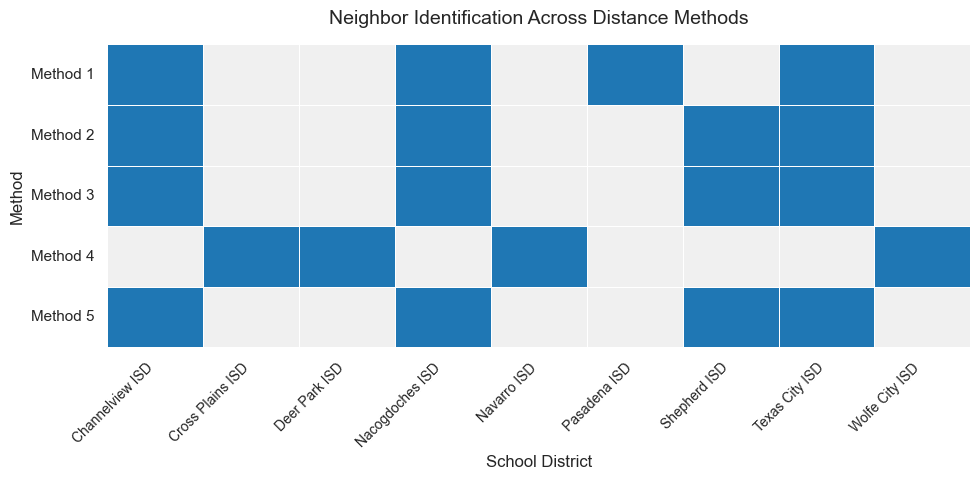

In [17]:
neighbors = compareMetrics(springISD, df = df, selected_features = economically_disadvantaged)

neighbors = neighbors[neighbors['DISTRICT_id'] != springISD]

neighbors['DISTNAME'] = [title_case_with_spaces(dist) for dist in neighbors['DISTNAME']]

# Presence matrix
presence_matrix = (
    neighbors.drop_duplicates()
      .assign(value=1)
      .pivot_table(index="DISTNAME", columns="metric", values="value", fill_value=0)
)


# Transpose for methods on y-axis
matrix_T = presence_matrix.T

# Plot
sns.set(style="whitegrid", font_scale=1.1)

# Dynamically widen plot based on district count
n_districts = matrix_T.shape[1]
fig_width = max(10, n_districts * 0.6)  # Adjust this multiplier as needed

plt.figure(figsize=(fig_width, 5))
ax = sns.heatmap(
    matrix_T,
    cmap=sns.color_palette(["#f0f0f0", "#1f77b4"]),
    linewidths=0.7,
    linecolor="white",
    cbar=False,
    square=False
)

# Clean formatting
ax.set_title("Neighbor Identification Across Distance Methods", fontsize=14, pad=15)
ax.set_xlabel("School District", fontsize=12)
ax.set_ylabel("Method", fontsize=12)

# Rotate both axes for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=11)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

## Neighbors, Special Education

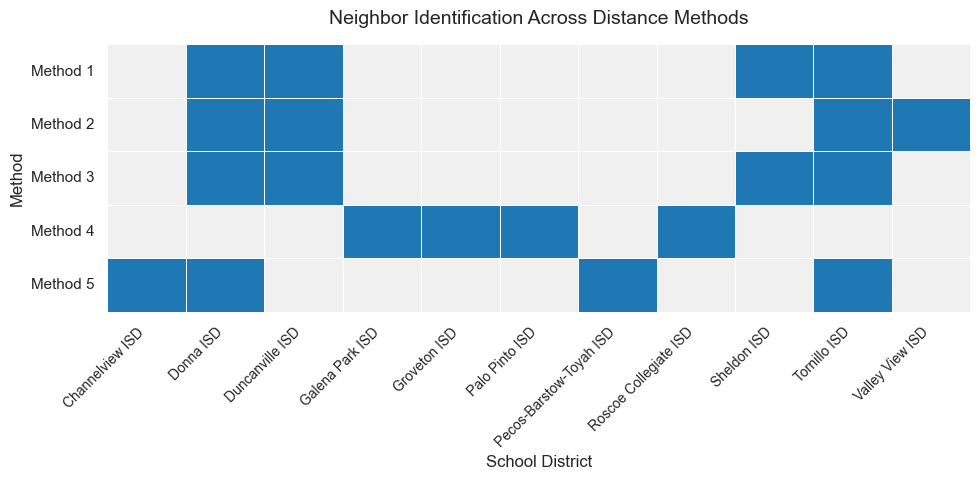

In [18]:
neighbors = compareMetrics(springISD, df = df, selected_features = special_ed_504)

neighbors = neighbors[neighbors['DISTRICT_id'] != springISD]

neighbors['DISTNAME'] = [title_case_with_spaces(dist) for dist in neighbors['DISTNAME']]

# Presence matrix
presence_matrix = (
    neighbors.drop_duplicates()
      .assign(value=1)
      .pivot_table(index="DISTNAME", columns="metric", values="value", fill_value=0)
)


# Transpose for methods on y-axis
matrix_T = presence_matrix.T

# Plot
sns.set(style="whitegrid", font_scale=1.1)

# Dynamically widen plot based on district count
n_districts = matrix_T.shape[1]
fig_width = max(10, n_districts * 0.6)  # Adjust this multiplier as needed

plt.figure(figsize=(fig_width, 5))
ax = sns.heatmap(
    matrix_T,
    cmap=sns.color_palette(["#f0f0f0", "#1f77b4"]),
    linewidths=0.7,
    linecolor="white",
    cbar=False,
    square=False
)

# Clean formatting
ax.set_title("Neighbor Identification Across Distance Methods", fontsize=14, pad=15)
ax.set_xlabel("School District", fontsize=12)
ax.set_ylabel("Method", fontsize=12)

# Rotate both axes for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=11)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

## Neighbors, Special Populations

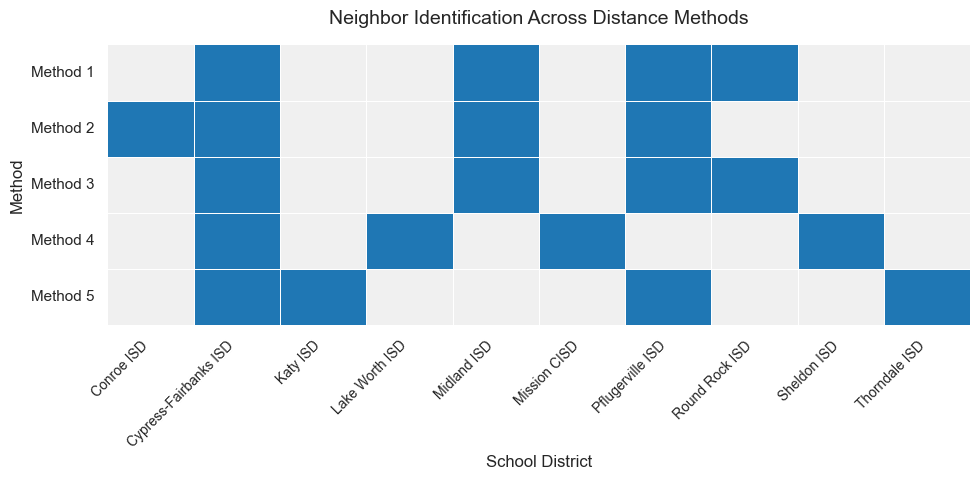

In [19]:
neighbors = compareMetrics(springISD, df = df, selected_features = special_populations_percent)

neighbors = neighbors[neighbors['DISTRICT_id'] != springISD]

neighbors['DISTNAME'] = [title_case_with_spaces(dist) for dist in neighbors['DISTNAME']]

# Presence matrix
presence_matrix = (
    neighbors.drop_duplicates()
      .assign(value=1)
      .pivot_table(index="DISTNAME", columns="metric", values="value", fill_value=0)
)


# Transpose for methods on y-axis
matrix_T = presence_matrix.T

# Plot
sns.set(style="whitegrid", font_scale=1.1)

# Dynamically widen plot based on district count
n_districts = matrix_T.shape[1]
fig_width = max(10, n_districts * 0.6)  # Adjust this multiplier as needed

plt.figure(figsize=(fig_width, 5))
ax = sns.heatmap(
    matrix_T,
    cmap=sns.color_palette(["#f0f0f0", "#1f77b4"]),
    linewidths=0.7,
    linecolor="white",
    cbar=False,
    square=False
)

# Clean formatting
ax.set_title("Neighbor Identification Across Distance Methods", fontsize=14, pad=15)
ax.set_xlabel("School District", fontsize=12)
ax.set_ylabel("Method", fontsize=12)

# Rotate both axes for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=11)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

## Neighbors, Staff Student Counts

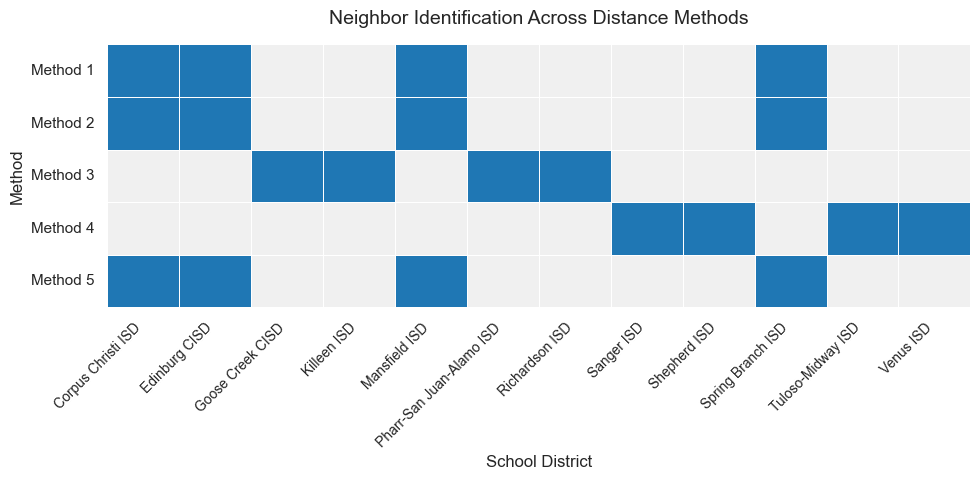

In [20]:
neighbors = compareMetrics(springISD, df = df, selected_features = staff_count + student_count)

neighbors = neighbors[neighbors['DISTRICT_id'] != springISD]

neighbors['DISTNAME'] = [title_case_with_spaces(dist) for dist in neighbors['DISTNAME']]

# Presence matrix
presence_matrix = (
    neighbors.drop_duplicates()
      .assign(value=1)
      .pivot_table(index="DISTNAME", columns="metric", values="value", fill_value=0)
)


# Transpose for methods on y-axis
matrix_T = presence_matrix.T

# Plot
sns.set(style="whitegrid", font_scale=1.1)

# Dynamically widen plot based on district count
n_districts = matrix_T.shape[1]
fig_width = max(10, n_districts * 0.6)  # Adjust this multiplier as needed

plt.figure(figsize=(fig_width, 5))
ax = sns.heatmap(
    matrix_T,
    cmap=sns.color_palette(["#f0f0f0", "#1f77b4"]),
    linewidths=0.7,
    linecolor="white",
    cbar=False,
    square=False
)

# Clean formatting
ax.set_title("Neighbor Identification Across Distance Methods", fontsize=14, pad=15)
ax.set_xlabel("School District", fontsize=12)
ax.set_ylabel("Method", fontsize=12)

# Rotate both axes for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=11)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

## Neighbors, Language Ed

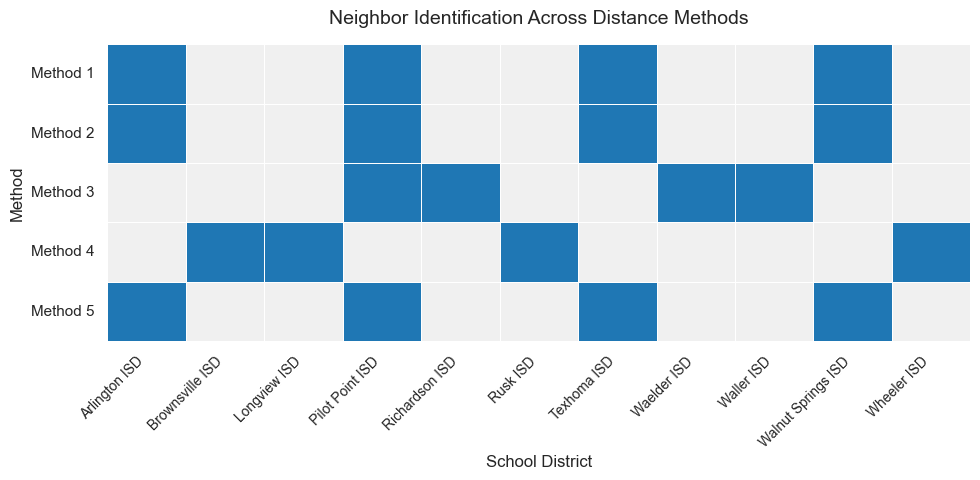

In [21]:
neighbors = compareMetrics(springISD, df = df, selected_features = language_education_percent)

neighbors = neighbors[neighbors['DISTRICT_id'] != springISD]

neighbors['DISTNAME'] = [title_case_with_spaces(dist) for dist in neighbors['DISTNAME']]

# Presence matrix
presence_matrix = (
    neighbors.drop_duplicates()
      .assign(value=1)
      .pivot_table(index="DISTNAME", columns="metric", values="value", fill_value=0)
)


# Transpose for methods on y-axis
matrix_T = presence_matrix.T

# Plot
sns.set(style="whitegrid", font_scale=1.1)

# Dynamically widen plot based on district count
n_districts = matrix_T.shape[1]
fig_width = max(10, n_districts * 0.6)  # Adjust this multiplier as needed

plt.figure(figsize=(fig_width, 5))
ax = sns.heatmap(
    matrix_T,
    cmap=sns.color_palette(["#f0f0f0", "#1f77b4"]),
    linewidths=0.7,
    linecolor="white",
    cbar=False,
    square=False
)

# Clean formatting
ax.set_title("Neighbor Identification Across Distance Methods", fontsize=14, pad=15)
ax.set_xlabel("School District", fontsize=12)
ax.set_ylabel("Method", fontsize=12)

# Rotate both axes for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=11)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()